In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score, f1_score

In [2]:
from src.load_utilities import *

In [3]:
X, y = load_processed_data()

Загружено: X.shape=(891, 17), y.shape=(891,)


In [4]:
X_train, X_test, y_train, y_target = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)
print(f'''
разделение данных на train/test

размерности выборок: X_train.shape = {X_train.shape}, X_test.shape = {X_test.shape}
размерности целевых значений: y_train = {len(y_train)}, y_target = {len(y_target)}

признаки: {X.columns}

примеры из X_train:
{X_train.head()}
''')


разделение данных на train/test

размерности выборок: X_train.shape = (712, 17), X_test.shape = (179, 17)
размерности целевых значений: y_train = 712, y_target = 179

признаки: Index(['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'FareBin_medium',
       'FareBin_high', 'FareBin_very_high', 'AgeGroups_younger',
       'AgeGroups_adult', 'AgeGroups_old'],
      dtype='object')

примеры из X_train:
          Age    SibSp     Parch      Fare  FamilySize  IsAlone  Sex_male  \
692 -0.104637  0.00100  0.001000  0.489104      0.0010        0         1   
481 -0.104637  0.00100  0.001000 -0.648422      0.0010        0         1   
527 -0.104637  0.00100  0.001000  3.817033      0.0010        0         1   
855 -0.873136  0.00100  0.167333 -0.460162      0.1008        1         0   
801  0.125912  0.12575  0.167333 -0.119886      0.2006        0         0   

     Embarked_Q  Embarked_S  Pclass_2  Pclass_3  Fare

In [5]:
m_models = {}

def evaluate_model(mdl, mdl_name='', X_train=X_train, X_test=X_test, y_train=y_train, y_target=y_target):
    if mdl_name == '':
        mdl_name = str(mdl)


    mdl_fit = mdl.fit(X_train, y_train)

    y_pred_train = mdl_fit.predict(X_train)
    y_pred_test = mdl_fit.predict(X_test)
    
    acc_tarin, acc_test = accuracy_score(y_train, y_pred_train), accuracy_score(y_target, y_pred_test)
    ind_overfit = acc_tarin - acc_test

    print(f"""
    модель: {mdl_name}
    {'_' * 100}

    метрики полной точности на train/test: acc_train = {acc_tarin:.3f}, acc_test = {acc_test:.3f}
    индикатор переобучения: ind_overfit = {ind_overfit:.3f}


    отчет по классификации (test):
    {classification_report(y_target, y_pred_test, target_names=['Not Survived (Negative)', 
                                            'Survived (Positive)'])}    
    """)


    cm = confusion_matrix(y_target, y_pred_test)
    plt.figure(figsize=(8, 6))
    sb.heatmap(cm, annot=True, fmt='d', cmap='Blues',
               xticklabels=['Predicted Negative', 
                           'Predicted Positive'],
               yticklabels=['Actual Negative', 
                           'Actual Positive'])
    plt.title(f'Confusion Matrix - {mdl_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    TN, FP, FN, TP = cm.ravel()
    print({'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN})
    return mdl_fit, y_pred_test, {'TP': TP, 'TN': TN, 'FP': FP, 'FN': FN}

In [6]:
from sklearn.dummy import DummyClassifier


    модель: Baseline (Most Frequent)
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.617, acc_test = 0.615
    индикатор переобучения: ind_overfit = 0.002


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.61      1.00      0.76       110
    Survived (Positive)       0.00      0.00      0.00        69

               accuracy                           0.61       179
              macro avg       0.31      0.50      0.38       179
           weighted avg       0.38      0.61      0.47       179
    
    


C:\Users\jack\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jack\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jack\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


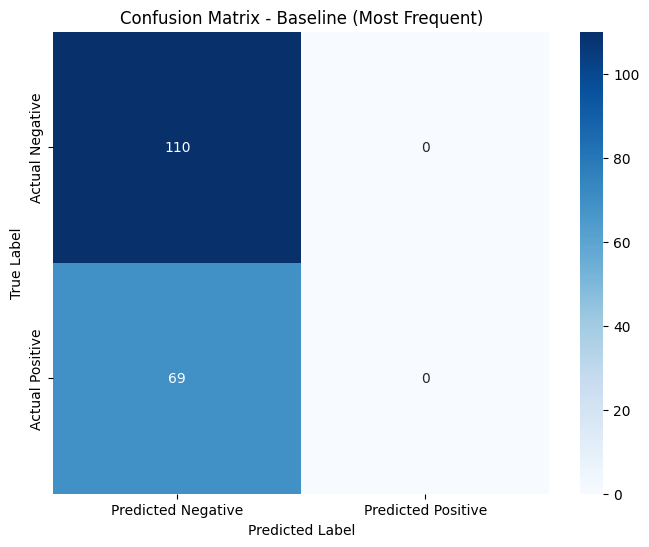

{'TP': np.int64(0), 'TN': np.int64(110), 'FP': np.int64(0), 'FN': np.int64(69)}


In [7]:
dummy = DummyClassifier(strategy='most_frequent', random_state=42)
dummy_fit, y_pred_dummy, dict_cm_dummy = evaluate_model(dummy, "Baseline (Most Frequent)")
m_models[dummy_fit] = 'Baseline'

In [8]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


    модель: GaussianNB()
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.768, acc_test = 0.754
    индикатор переобучения: ind_overfit = 0.014


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.79      0.81      0.80       110
    Survived (Positive)       0.69      0.67      0.68        69

               accuracy                           0.75       179
              macro avg       0.74      0.74      0.74       179
           weighted avg       0.75      0.75      0.75       179
    
    


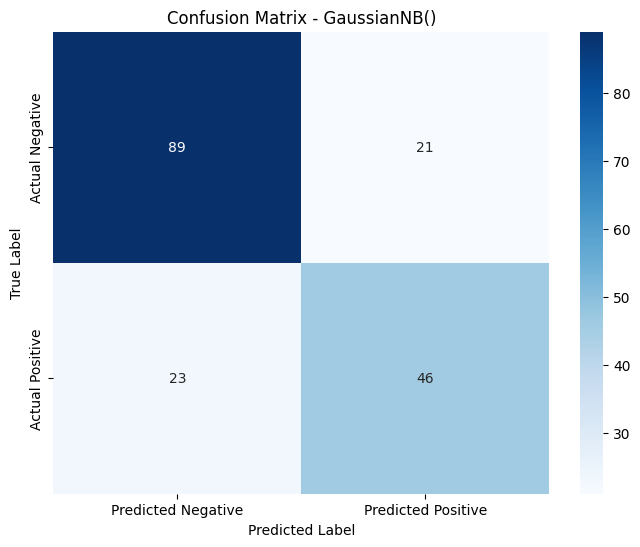

{'TP': np.int64(46), 'TN': np.int64(89), 'FP': np.int64(21), 'FN': np.int64(23)}


In [9]:
nb_model = GaussianNB()
nb_fit, y_nb_test, dict_cm_nb = evaluate_model(nb_model)
m_models[nb_fit] = str(nb_model)


    модель: LogisticRegression()
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.809, acc_test = 0.788
    индикатор переобучения: ind_overfit = 0.021


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.80      0.87      0.83       110
    Survived (Positive)       0.76      0.65      0.70        69

               accuracy                           0.79       179
              macro avg       0.78      0.76      0.77       179
           weighted avg       0.79      0.79      0.78       179
    
    


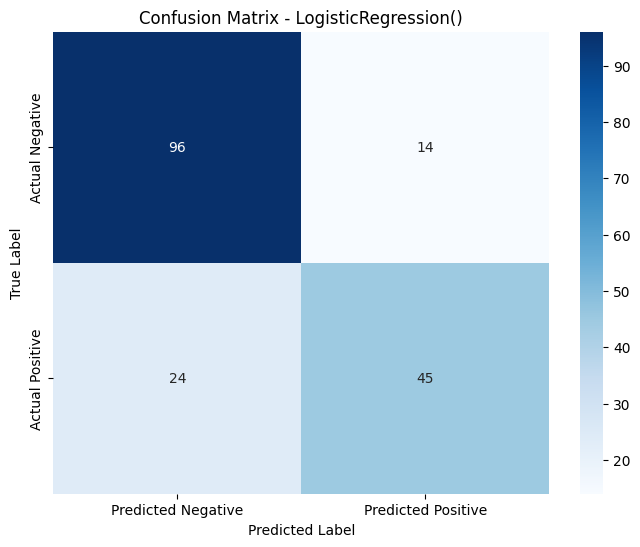

{'TP': np.int64(45), 'TN': np.int64(96), 'FP': np.int64(14), 'FN': np.int64(24)}


In [10]:
lgreg_model = LogisticRegression()
lgreg_fit, y_pred_lgreg, dict_lgreg_cm = evaluate_model(lgreg_model)
m_models[lgreg_fit] = str(lgreg_fit)


    модель: KNeighborsClassifier(n_neighbors=3)
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.882, acc_test = 0.777
    индикатор переобучения: ind_overfit = 0.105


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.80      0.85      0.82       110
    Survived (Positive)       0.74      0.65      0.69        69

               accuracy                           0.78       179
              macro avg       0.77      0.75      0.76       179
           weighted avg       0.77      0.78      0.77       179
    
    


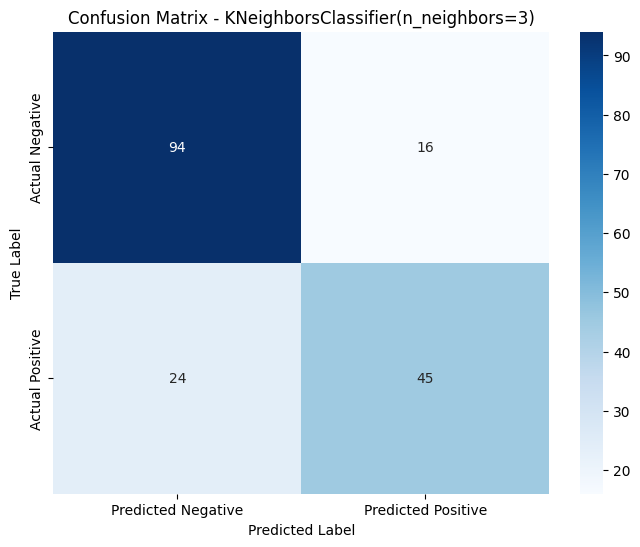

{'TP': np.int64(45), 'TN': np.int64(94), 'FP': np.int64(16), 'FN': np.int64(24)}

    модель: KNeighborsClassifier()
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.846, acc_test = 0.754
    индикатор переобучения: ind_overfit = 0.091


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.78      0.83      0.81       110
    Survived (Positive)       0.70      0.64      0.67        69

               accuracy                           0.75       179
              macro avg       0.74      0.73      0.74       179
           weighted avg       0.75      0.75      0.75       179
    
    


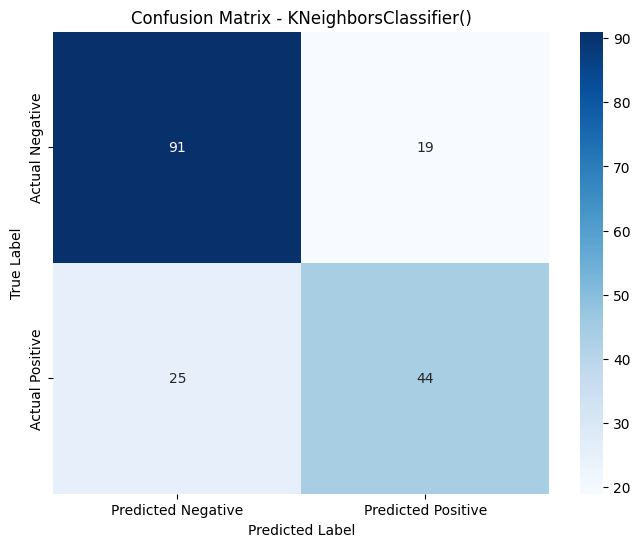

{'TP': np.int64(44), 'TN': np.int64(91), 'FP': np.int64(19), 'FN': np.int64(25)}

    модель: KNeighborsClassifier(n_neighbors=10)
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.834, acc_test = 0.765
    индикатор переобучения: ind_overfit = 0.069


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.76      0.90      0.82       110
    Survived (Positive)       0.78      0.55      0.64        69

               accuracy                           0.77       179
              macro avg       0.77      0.73      0.73       179
           weighted avg       0.77      0.77      0.76       179
    
    


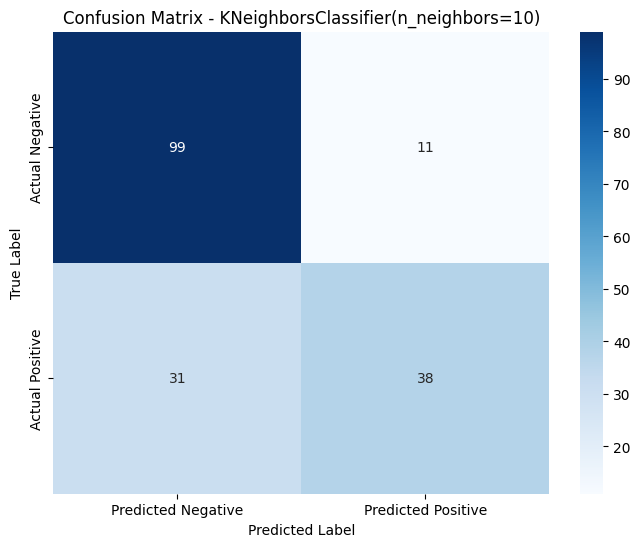

{'TP': np.int64(38), 'TN': np.int64(99), 'FP': np.int64(11), 'FN': np.int64(31)}

    модель: KNeighborsClassifier(n_neighbors=20)
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.813, acc_test = 0.726
    индикатор переобучения: ind_overfit = 0.087


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.74      0.86      0.79       110
    Survived (Positive)       0.70      0.51      0.59        69

               accuracy                           0.73       179
              macro avg       0.72      0.69      0.69       179
           weighted avg       0.72      0.73      0.72       179
    
    


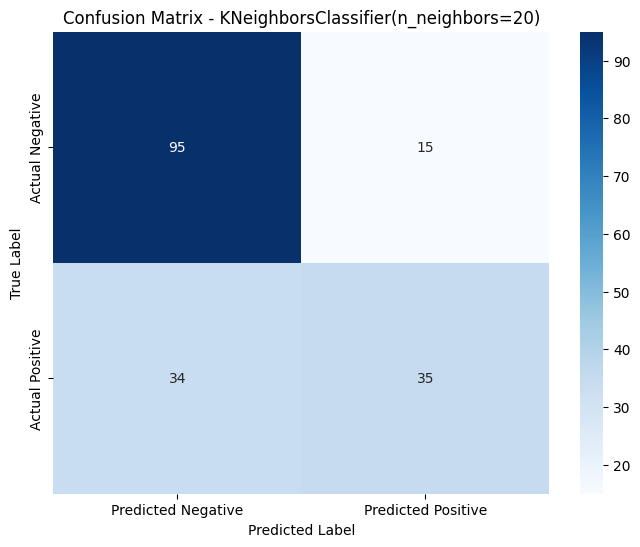

{'TP': np.int64(35), 'TN': np.int64(95), 'FP': np.int64(15), 'FN': np.int64(34)}


In [11]:
K = [3, 5, 10, 20]
res_knn = {}
for k in K:
    knn = KNeighborsClassifier(n_neighbors=k)

    knn_fit, y_pred_knn, dict_cm_knn = evaluate_model(knn)
    res_knn[k] = {'knn_fit': knn_fit, 'y_pred_knn': y_pred_knn, 'dict_cm_knn': dict_cm_knn}
    m_models[knn_fit] = str(knn_fit)


    модель: RandomForestClassifier(max_depth=5)
    ____________________________________________________________________________________________________

    метрики полной точности на train/test: acc_train = 0.857, acc_test = 0.799
    индикатор переобучения: ind_overfit = 0.058


    отчет по классификации (test):
                             precision    recall  f1-score   support

Not Survived (Negative)       0.79      0.92      0.85       110
    Survived (Positive)       0.82      0.61      0.70        69

               accuracy                           0.80       179
              macro avg       0.81      0.76      0.77       179
           weighted avg       0.80      0.80      0.79       179
    
    


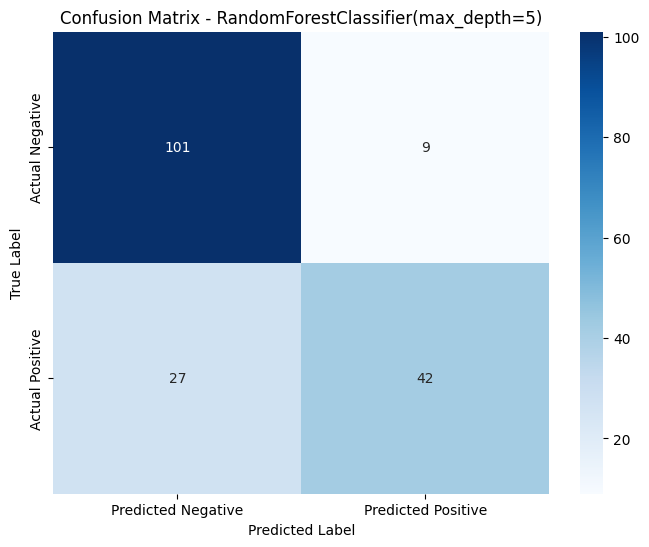

{'TP': np.int64(42), 'TN': np.int64(101), 'FP': np.int64(9), 'FN': np.int64(27)}


In [12]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)

rf_fit, y_pred_rf, dict_cm_rf = evaluate_model(rf)
m_models[rf_fit] = str(rf_fit)

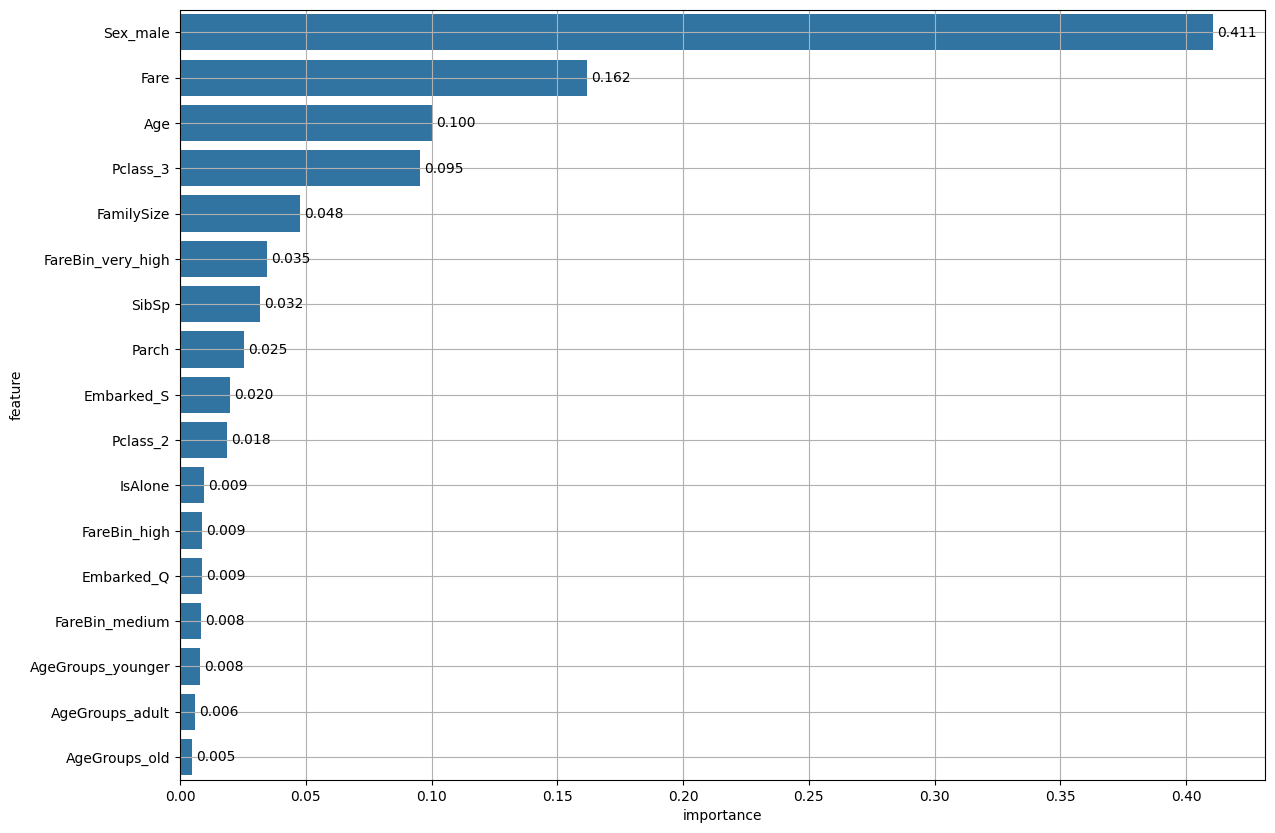

In [13]:
df_ftr_imp = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_fit.feature_importances_
}).sort_values('importance', ascending=False)
fig = plt.figure(figsize=(14, 10))
L = sb.barplot(df_ftr_imp, y='feature', x='importance')
for con in L.containers:
    L.bar_label(con, fmt='%.3f', padding=3)
plt.grid(True)
plt.show()

In [14]:
def model_metrics(model_fit, X_test = X_test, y_target = y_target, X_train = X_train, y_train = y_train):
    y_pred_train = model_fit.predict(X_train)
    y_pred_test = model_fit.predict(X_test)
    return {'model_name': m_models[model_fit], 
            'accuracy_train': round(accuracy_score(y_train, y_pred_train), 3), 
            'accuracy_test': round(accuracy_score(y_target, y_pred_test), 3), 
            'recall': round(recall_score(y_target, y_pred_test, pos_label=1), 3), 
            'precision': round(precision_score(y_target, y_pred_test, pos_label=1), 3), 
            'f1': round(f1_score(y_target, y_pred_test, pos_label=1), 3),
           'ind_overfit': round(accuracy_score(y_train, y_pred_train) - accuracy_score(y_target, y_pred_test), 3)}

In [15]:
df_res_base_models = pd.DataFrame([model_metrics(mdl) for mdl in list(m_models.keys())])
df_res_base_models

C:\Users\jack\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,model_name,accuracy_train,accuracy_test,recall,precision,f1,ind_overfit
0,Baseline,0.617,0.615,0.000,0.000,0.000,0.002
1,GaussianNB(),0.768,0.754,0.667,0.687,0.676,0.014
2,LogisticRegression(),0.809,0.788,0.652,0.763,0.703,0.021
3,KNeighborsClassifier(n_neighbors=3),0.882,0.777,0.652,0.738,0.692,0.105
4,KNeighborsClassifier(),0.846,0.754,0.638,0.698,0.667,0.091
5,KNeighborsClassifier(n_neighbors=10),0.834,0.765,0.551,0.776,0.644,0.069
6,KNeighborsClassifier(n_neighbors=20),0.813,0.726,0.507,0.700,0.588,0.087
7,RandomForestClassifier(max_depth=5),0.857,0.799,0.609,0.824,0.700,0.058


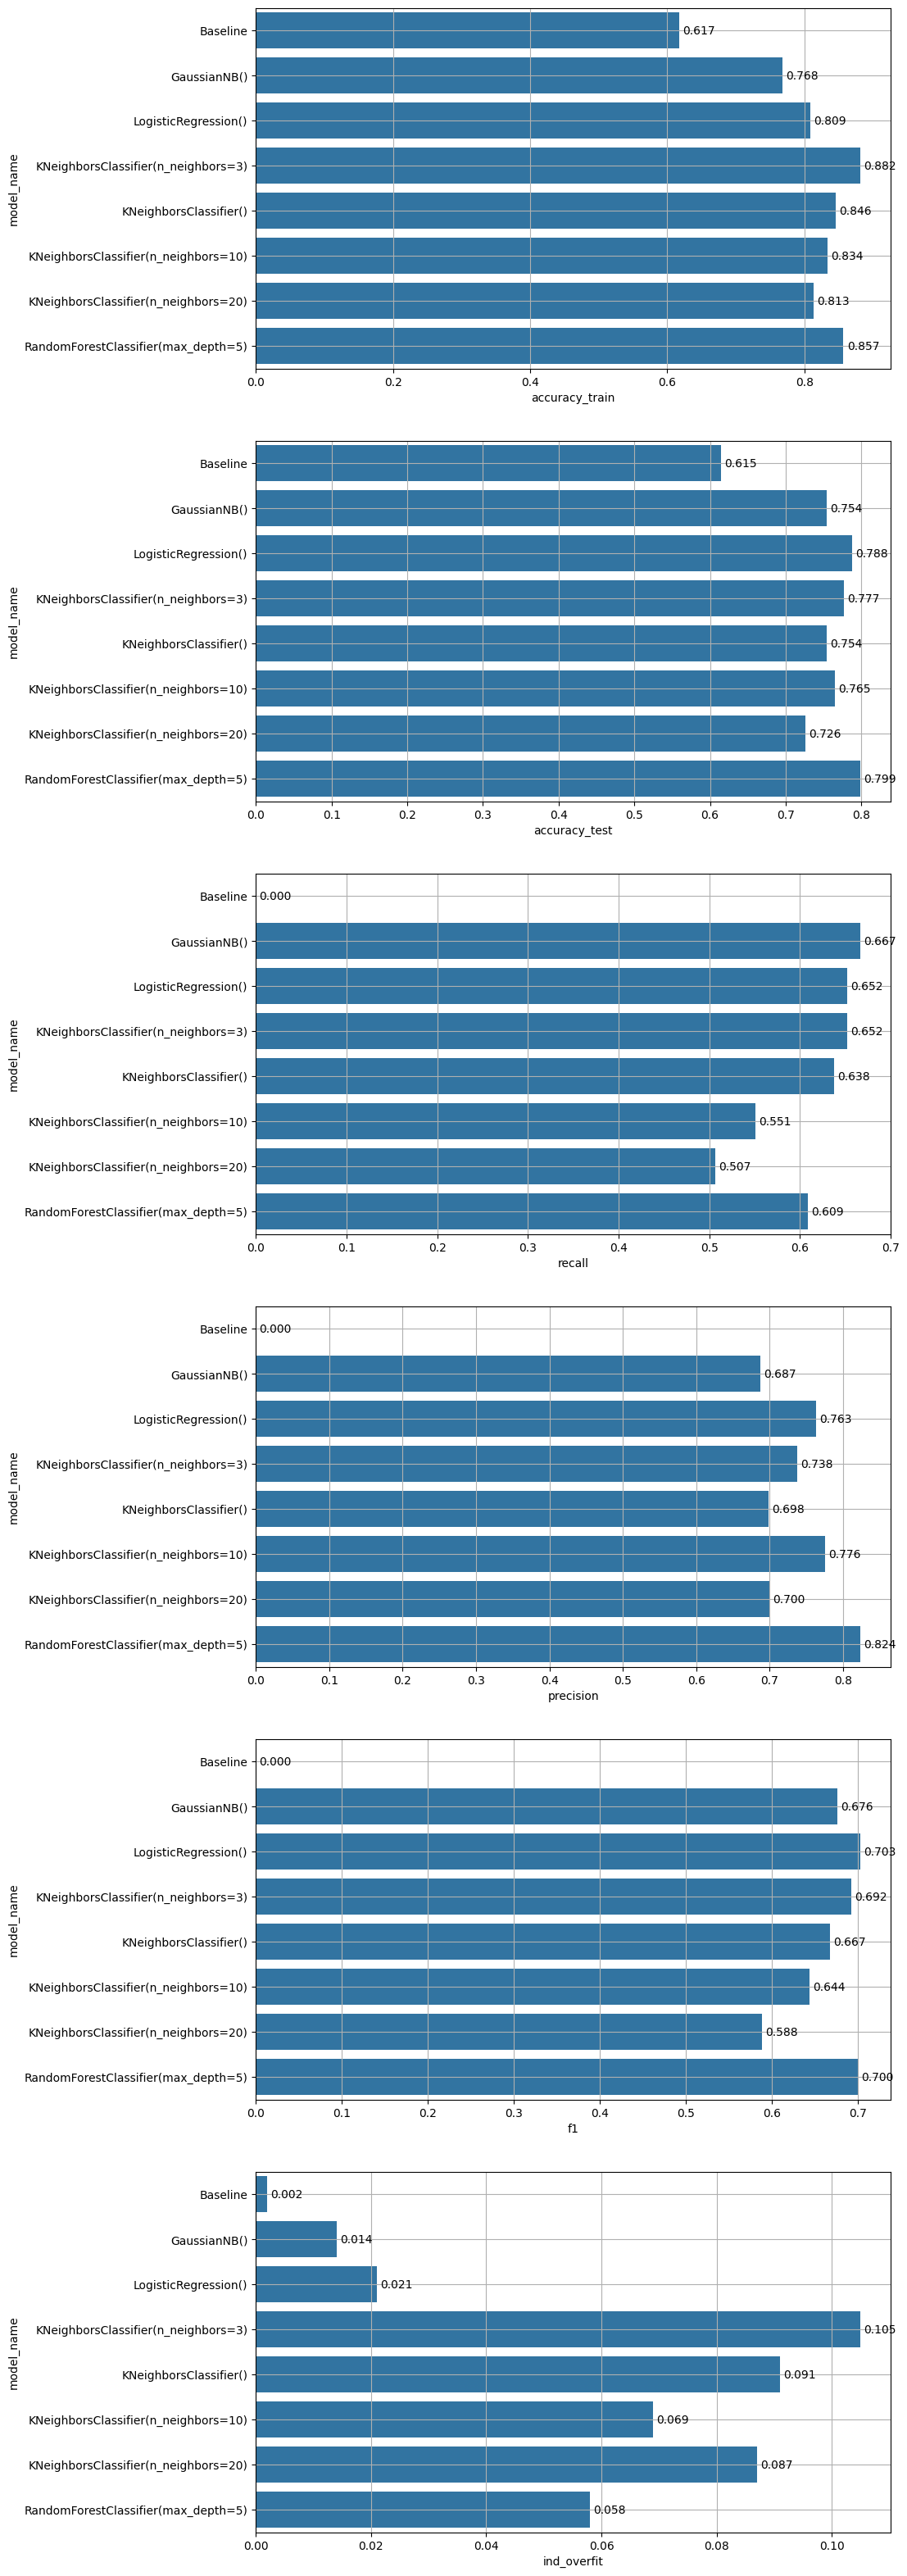

In [17]:
clms = list(df_res_base_models)[1:]

fig, axes = plt.subplots(len(clms), 1, figsize=(10, 40))

for i in range(len(df_res_base_models.columns)-1):
    clm = clms[i]
    L = sb.barplot(df_res_base_models, x=clm, y=df_res_base_models.loc[:, 'model_name'], ax=axes[i])
    for con in L.containers:
        L.bar_label(con, fmt='%.3f', padding=3)
    axes[i].grid(True)
plt.show()

In [18]:
lgreg_fit.coef_

array([[-0.38571229, -1.12669512, -0.53497522,  0.12127647, -1.22251086,
        -0.0784926 , -2.49960595,  0.31794584, -0.4384044 , -0.58855701,
        -1.61686196,  0.25172662,  0.5694497 ,  0.65581967, -0.61337145,
        -0.33999133, -0.67863091]])

In [19]:
X.columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'IsAlone', 'Sex_male',
       'Embarked_Q', 'Embarked_S', 'Pclass_2', 'Pclass_3', 'FareBin_medium',
       'FareBin_high', 'FareBin_very_high', 'AgeGroups_younger',
       'AgeGroups_adult', 'AgeGroups_old'],
      dtype='object')